In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('D:/Bharat Intern/Titanic/train.csv')
test = pd.read_csv('D:/Bharat Intern/Titanic/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [7]:
train['Embarked'].fillna('S',inplace=True)

In [8]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [10]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)

In [11]:
train['Age'][np.isnan(train['Age'])]=gen_age

C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\283863123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])]=gen_age


In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
gen_age1=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)

In [14]:
test['Age'][np.isnan(test['Age'])]=gen_age1

C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\2126762493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][np.isnan(test['Age'])]=gen_age1


In [15]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

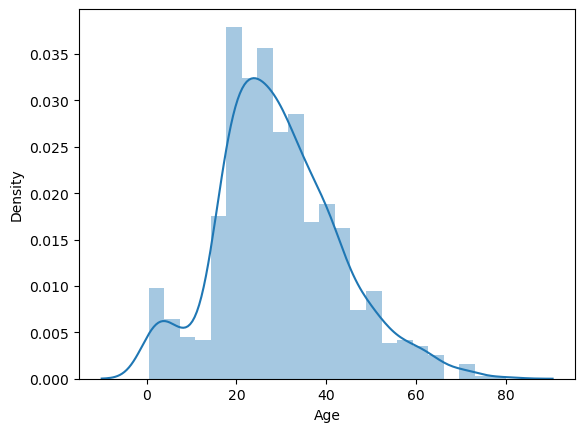

In [19]:
sns.distplot(train['Age'])

<Axes: >

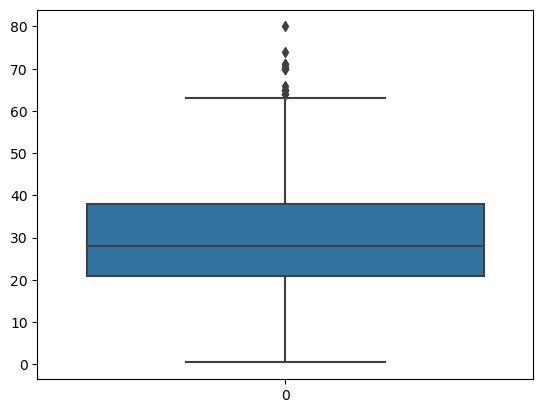

In [20]:
sns.boxplot(train['Age'])

In [21]:
train[train['Age']>75]['Survived'].value_counts()

1    1
Name: Survived, dtype: int64

C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\3289552761.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==0]['Age'])
C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\3289552761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==1]['Age']

<Axes: xlabel='Age', ylabel='Density'>

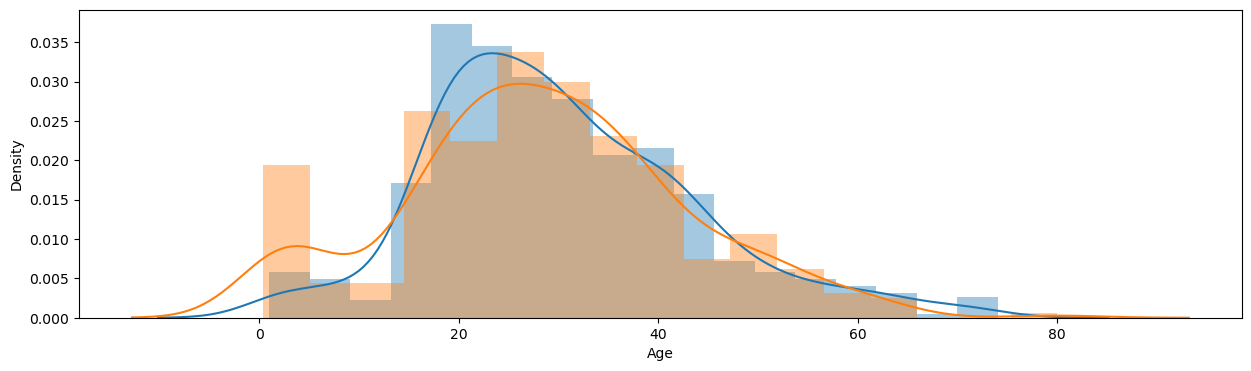

In [22]:
plt.subplots(figsize=(15,4))
sns.distplot(train[train['Survived']==0]['Age'])
sns.distplot(train[train['Survived']==1]['Age'])

In [23]:
passengerId=test['PassengerId'].values

In [24]:
train.drop(columns=['PassengerId','Ticket'],inplace=True)
test.drop(columns=['PassengerId','Ticket'],inplace=True)

In [25]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\891094164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

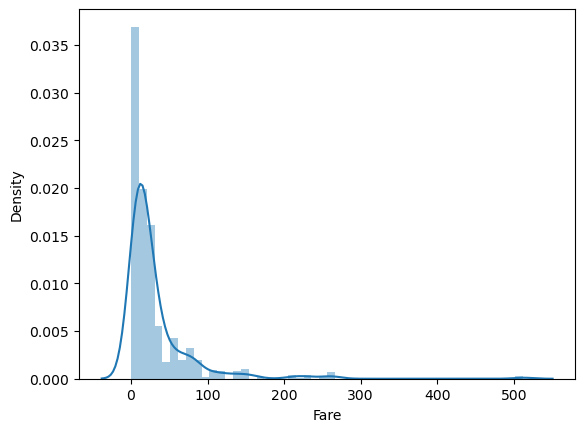

In [26]:
sns.distplot(train['Fare'])

<Axes: >

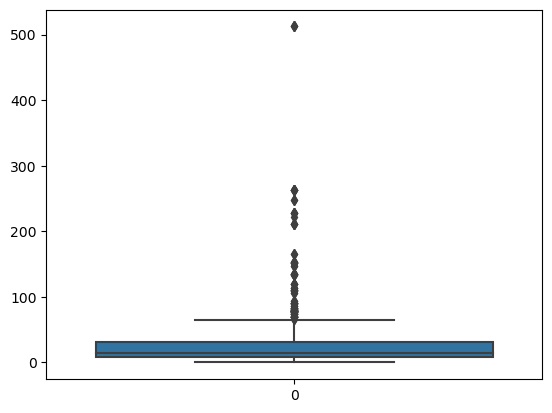

In [27]:
sns.boxplot(train['Fare'])

In [28]:
train[train['Fare']>400]['Survived'].value_counts()

1    3
Name: Survived, dtype: int64

C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\250516256.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==0]['Fare'])
C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\250516256.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==1]['Fare']

<Axes: xlabel='Fare', ylabel='Density'>

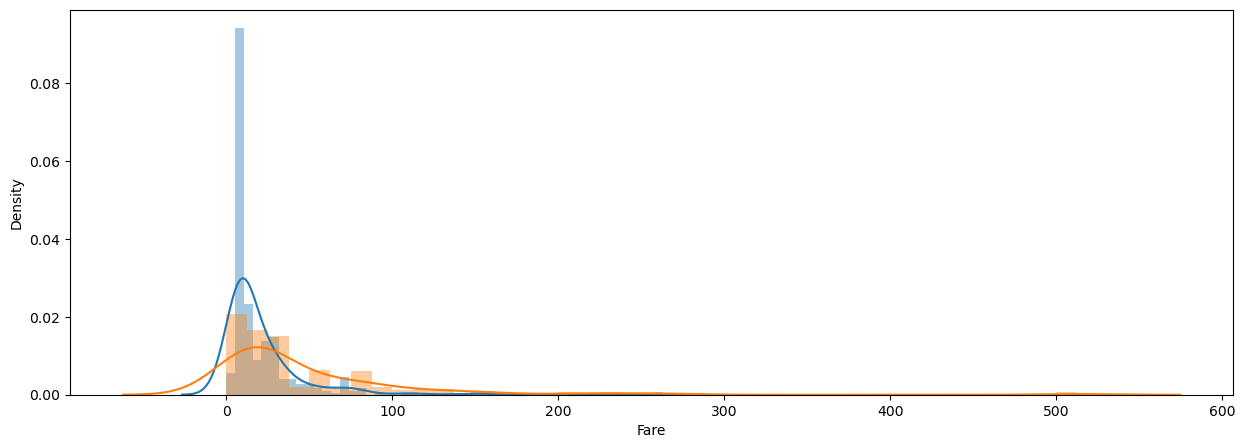

In [29]:
plt.subplots(figsize=(15,5))
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])

In [30]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [31]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [32]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [33]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [34]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [35]:
train[['family','Survived']].groupby('family').mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [36]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [37]:
family_size(5)

'Large'

In [38]:
train['family_size']=train['family'].apply(family_size)

In [39]:
test['family_size']=test['family'].apply(family_size)

In [40]:
train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)

In [41]:
y=train['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [42]:
train.drop(columns=['Survived'],inplace=True)

In [43]:
print(train.shape)
print(test.shape)

(891, 6)
(418, 6)


In [44]:
final=train.append(test)

C:\Users\dhara\AppData\Local\Temp\ipykernel_26016\2182374563.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=train.append(test)


In [45]:
final.shape

(1309, 6)

In [46]:
final=pd.get_dummies(final, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)

In [47]:
Xf=final.tail(418).values

In [48]:
X=final.head(891).values

In [49]:
X.shape

(891, 9)

In [50]:
y.shape

(891,)